<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 3 / NOTE 4*

# 📝 Assignment
---

# Interpreting ML Model

### 1) PDP를 만들어 모델을 설명하세요
- 한 특성에 대한 PDP를 만들고 모델을 설명하세요
- 두 특성간 관계에 대한 PDP를 만들고 모델을 설명하세요
- **(Urclass Quiz) Boston 데이터의 train 데이터를 사용해 PDP plots을 그린 후, 집값에 대해 양의 선형관계를 나타내는 특성을 고르세요.**
    - 1) LSTAT
    - 2) B
    - 3) TAX
    - 4) AGE


In [1]:
!pip install shap
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 3.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 239 kB/s 
     |████████████████████████████████| 13.1 MB 28.1 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=27700efc7d48f794efb7b95e0ca64231088fcf28d58ae53d8ecc6ef75df62dcc
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.

In [2]:
### (Urclass Quiz) 이곳에서 과제를 진행해 주세요 ###
import sklearn
import xgboost
import shap
from sklearn.model_selection import train_test_split
import pdpbox.pdp as pdp

shap.initjs();

df, target = shap.datasets.boston()
X_train,X_test,y_train,y_test = train_test_split(df, target, test_size=0.2, random_state=2)

model = xgboost.XGBRegressor().fit(X_train, y_train)

### Draw PDP plots ###
def make_pdp_plot(feat:str):
  return pdp.pdp_plot(
    pdp.pdp_isolate(
        model, df,
        model_features= df.columns,
        feature=feat
    ), feature_name=feat
  )

[11:11:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


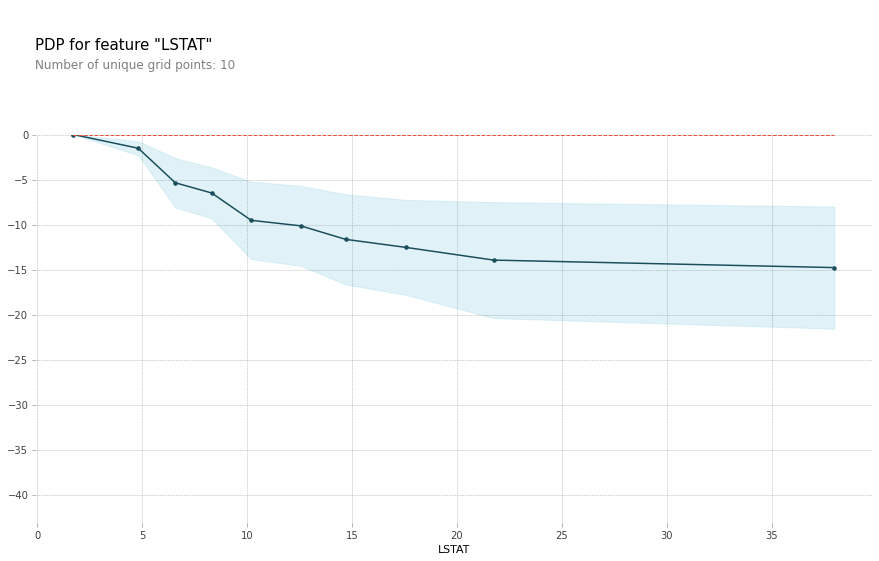

In [3]:
make_pdp_plot('LSTAT');

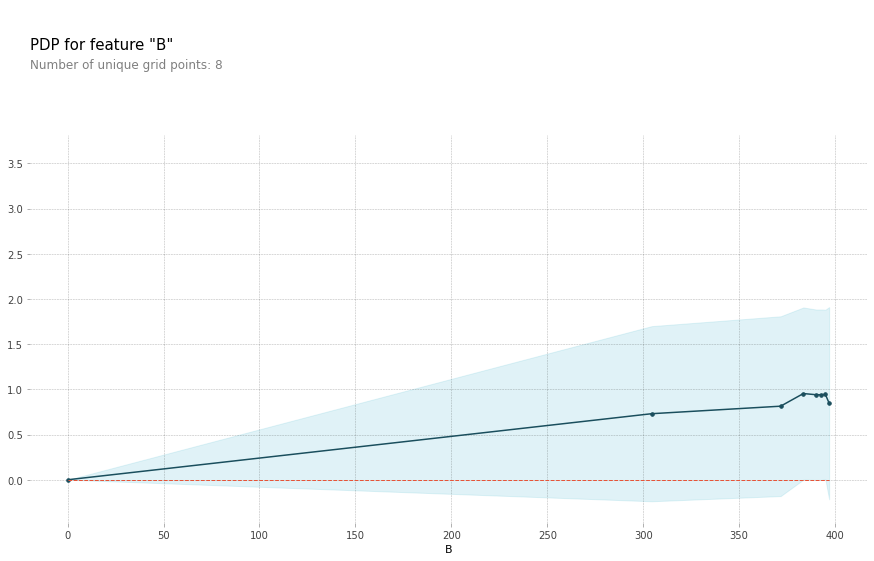

In [4]:
make_pdp_plot('B');

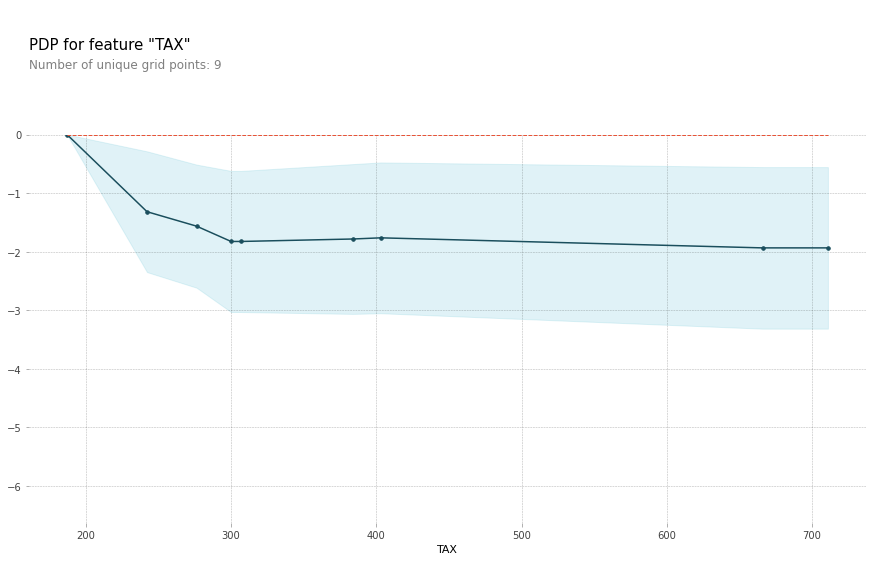

In [5]:
make_pdp_plot('TAX');

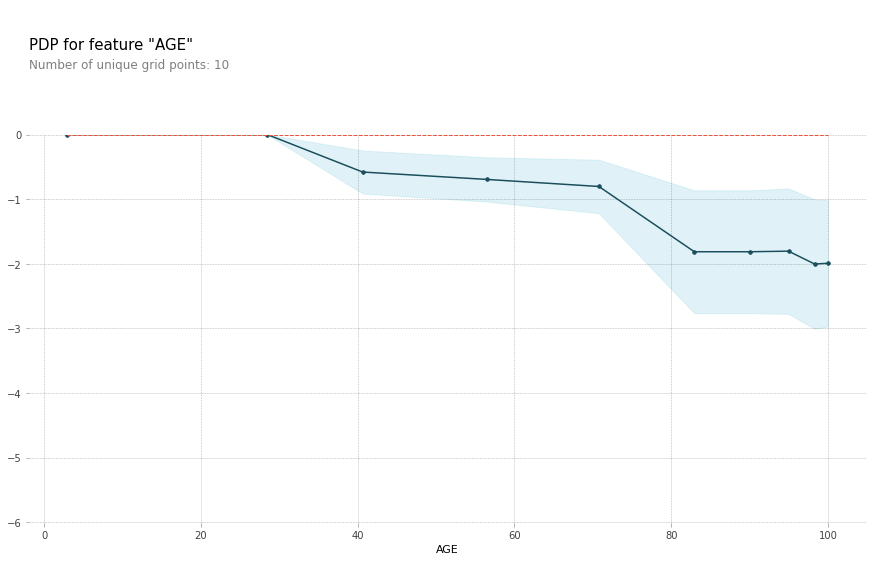

In [6]:
make_pdp_plot('AGE');

### 2) SHAP 라이브러리를 사용해 최소 3개 이상 시각화를 하고 분석하세요
- **(Urclass Quiz) SHAP 라이브러리를 사용해 다음 문항 중 설명이 올바른 항목을 선택하세요.**
    - 1) force_plot을 그려보면 CRIM은 항상 가격을 낮추는 영향을 준다.
    - 2) SHAP의 summary_plot을 사용하면 permutation importance를 구할 수 있다.
    - 3) SHAP summary_plot을 그려보면 (조건: X_train, plot_type='bar') LSTAT이 가장 영향력이 큰 특성으로 보인다.
    - 4) 모델의 feature importance(model.feature_importances_)를 구하면 가장 영향력이 큰 특성이 LSTAT임을 알 수있다.


ZN         0.005187
AGE        0.008713
CHAS       0.010036
INDUS      0.011504
RAD        0.012394
B          0.012665
TAX        0.025285
CRIM       0.040354
PTRATIO    0.041819
NOX        0.044341
DIS        0.044467
RM         0.152121
LSTAT      0.591114
dtype: float32


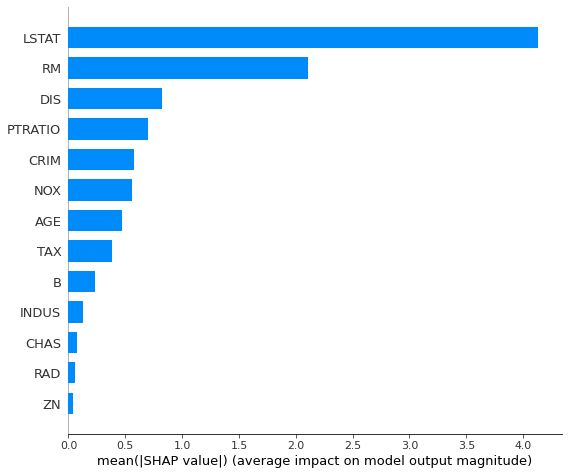

In [7]:
### (Urclass Quiz) 이곳에서 과제를 진행해 주세요 ###
explainer = shap.TreeExplainer(model)
### Draw SHAP plots ###
s_values = explainer.shap_values(X_train)

import pandas as pd
print(pd.Series(model.feature_importances_, index=df.columns).sort_values())

shap.summary_plot(s_values, X_train, plot_type='bar')

In [8]:
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=s_values, 
    features=X_train, 
    link='logit' # SHAP value를 확률로 변환해 표시합니다.
)

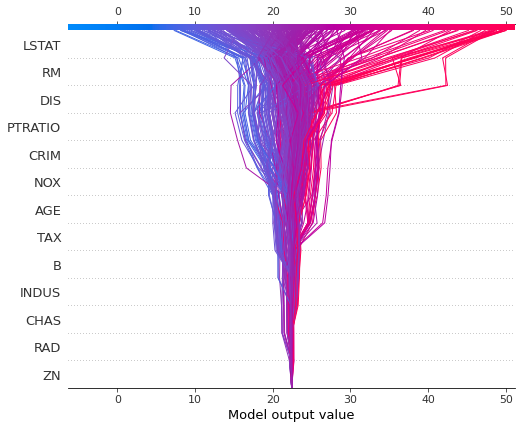

In [9]:
shap.decision_plot(explainer.expected_value, s_values, X_train)

## 🔥 도전과제(Github - Discussion)

### 머신러닝 모델 해석 방법들의 장단점과 각각 어떤 방식으로 활용할 수 있을지 논의해 보세요. 


In [ ]:
### 이곳에서 과제를 진행해 주세요 ###